<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Collabs/blob/main/IntroMachinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Sistemas de Machine Learning

#### Referencia: Cap 1-3, Hands‑on Machine Learning with Scikit‑Learn, Keras & TensorFlow – Concepts, Tools, and Techniques to Build Intelligent Systems



## Que es Machine Learning?
Machine Learning es la ciencia de programar algoritmos para que puedan aprender de la *data*. Se compone de un conjunto de herramientas y técnicas que transforma datos en decisiones (*ojalá buenas*) mediante clasificaciones,
como si a alguien le gustará o no una comida; o predicciones cuantitativas,
como qué tan alto es alguien.
Entonces su principal funcion es la de clasificar y predecir. Cuando usamos machine learning para clasificar cosas, lo llamamos **Clasificación**. Y cuando hacemos predicciones cuantitativas, lo llamamos **Regresión**.


---



## Tipos de Sistemas de Machine Learning
Los sistemas de ML se pueden clasificar según:

Si son la informacion que se utiliza para entrenamiento presenta la etiqueta que se pretende predecir:
*   Aprendizaje supervisado
*   Aprendizaje no supervisado
*   Semi-supervisado
*   Aprendizaje por refuerzo

Si aprenden en línea o en lote:
*   Online learning
*   Batch learning

Si basan sus predicciones simplemente comparando el nuevo input con la informacion conocida, o detectan patrones de la informacion de training y crean un modelo predictivo:

*   Instance-based learning
*   Model-based learning

## Aprendizaje supervisado
El conjunto de entrenamiento contiene las soluciones deseadas (etiquetas).

Ejemplo típico: clasificación (p.ej., clasificador de spam).
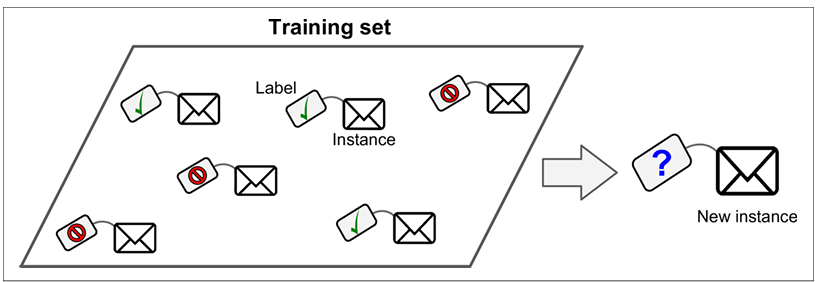



Ejemplos de algoritmos:
*   Regresión lineal
*   Regresión logística
*   Support Vector Machines (SVM)
*   Árboles de decisión - Random Forest


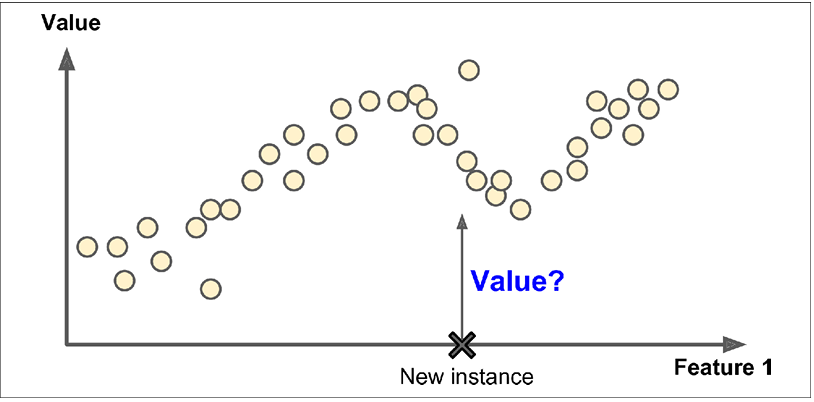


##  Aprendizaje no supervisado
Los datos no están etiquetados.

Ejemplos de algoritmos:
*   Clustering: k-Means, DBSCAN, HCA
*   Detección de anomalías: One-class SVM, Isolation Forest
*   Reducción de dimensionalidad: PCA, t-SNE
*   Reglas de asociación: Apriori

## Principales desafios en Machine Learning
Hay dos principales responsables de las dificultades en Machine Learning - **Malos datos** o **Mala seleccion del algoritmo** (modelo)

### Mala Data

*   Insuficiente cantidad de datos  -  [The Unreasonable Effectiveness of Data](https://static.googleusercontent.com/media/research.google.com/es//pubs/archive/35179.pdf)
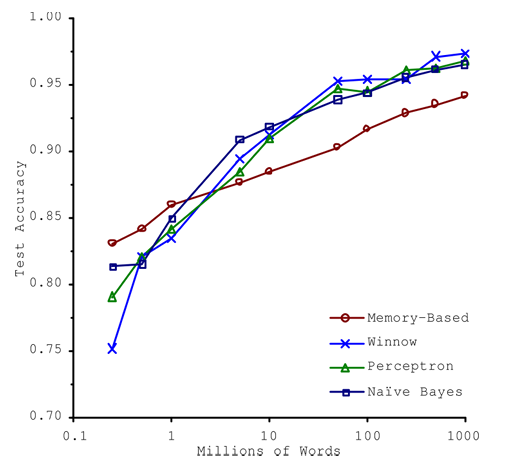

*   Datos no representativos
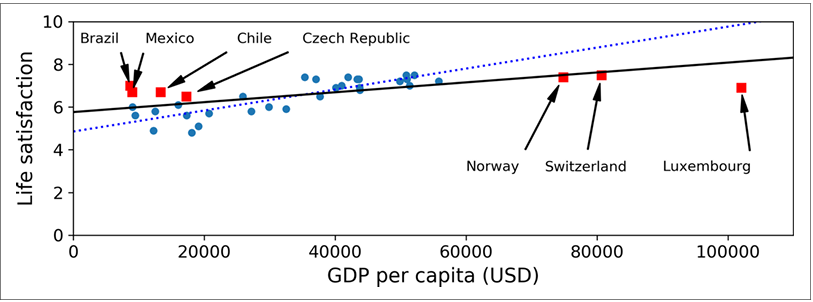

*   Datos de baja calidad (ruido, errores)
*   Variables irrelevantes



### Mala seleccion del algoritmo

*   Overfitting

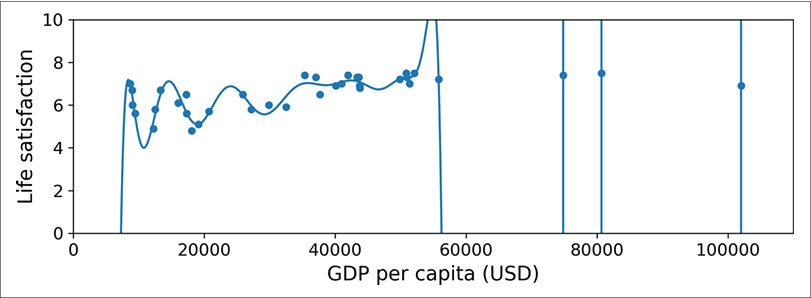
*   Underfitting



---



## Ejemplo Práctico con Datos Clínicos: [Breast Cancer Wisconsin Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)


In [ ]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import cross_val_score, LeaveOneOut

# Cargar dataset
data = load_breast_cancer()

X = data.data
y = data.target

# Ver shape
X.shape, y.shape


((569, 30), (569,))

In [ ]:
# Exploración simple

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


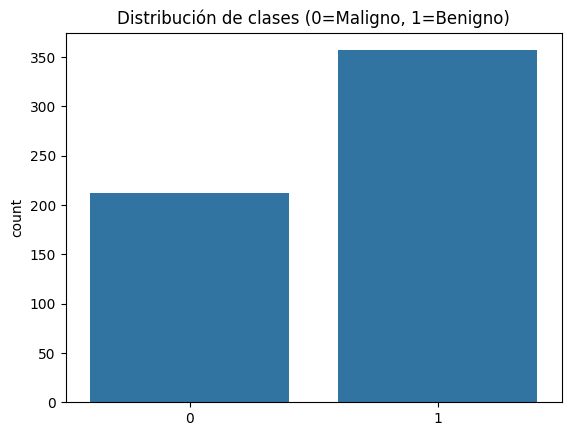

In [ ]:
# Distribución de clases
sns.countplot(x=y)
plt.title("Distribución de clases (0=Maligno, 1=Benigno)")
plt.show()




---


### Descripcion del dataset

*   30 variables clínicas (features) extraídas de imágenes.
*   569 Muestras
*   Clasificacion binaria --> 0 = Maligno | 1 = Benigno

Vamos a ilustrar overfitting / underfitting con una función simple.



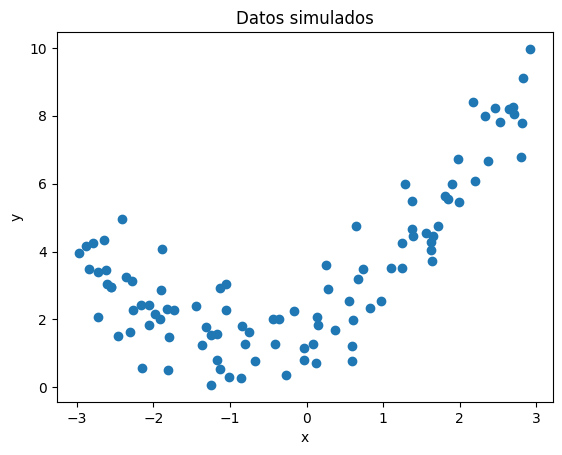

In [ ]:
# Datos simulados
np.random.seed(42)
m = 100
X_sim = 6 * np.random.rand(m, 1) - 3
y_sim = 0.5 * X_sim**2 + X_sim + 2 + np.random.randn(m, 1)

# Plot
plt.scatter(X_sim, y_sim)
plt.title("Datos simulados")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


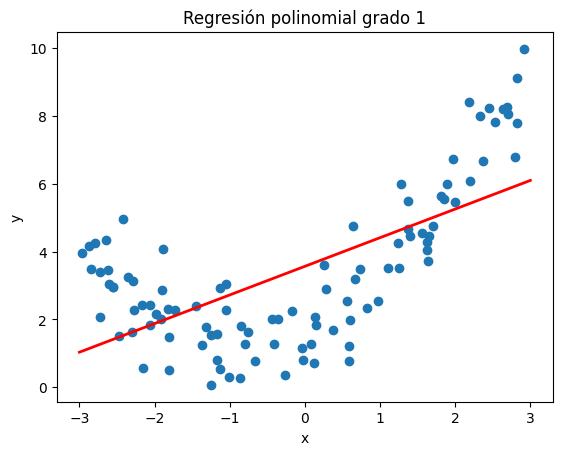

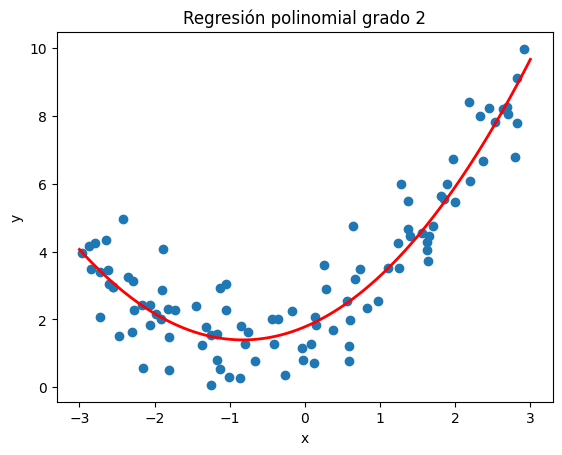

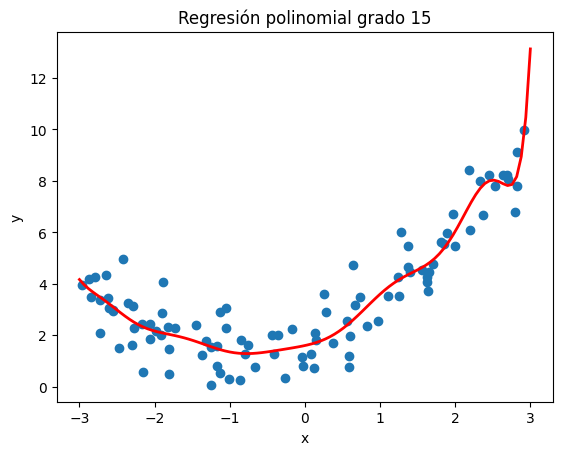

In [ ]:
# Definir función para graficar modelos de diferentes grados

def plot_poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X_sim)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_sim)

    X_new=np.linspace(-3,3,100).reshape(100,1)
    X_new_poly=poly_features.transform(X_new)
    y_new=lin_reg.predict(X_new_poly)

    plt.scatter(X_sim, y_sim)
    plt.plot(X_new, y_new, "r-", linewidth=2)
    plt.title(f"Regresión polinomial grado {degree}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Modelos grado 1, 2, 15
for degree in [1, 2, 15]:
    plot_poly_regression(degree)




---


### ¿Que ajuste elegirían?

## Entrenamiento, Testeo y Validación
**Entrenamiento (Train)**: Se hace para estimar los parámetros del algoritmo que vamos a usar.

**Evaluacion (Testing)**: Se hace para evaluar cuan bien funciona el algoritmo. Para esto se utiliza el *Generalization error* (tambien se puede denominar *out-of-sample error*) que nos permite conocer el ratio de error que tiene el modelo en nuevos casos.
Si el *training error* es bajo pero el *generalization* es alto, *overfitting*.

Pero hay que considerar como trabajar con mi dataset:
*   Si usamos el set completo de data que disponemos para training nos quedamos sin informacion para testing.
*   Reusar la misma data en entrenamiento y en testeo tampoco sirve porque necesitamos saber como funciona para datos en los cuales no fue entrenado.
Es por eso que lo que se recomienda es  dividir la data en 2 sets, el *training set* y el *testing set*.





#### *Cross validation*
Utiliza combinaciones disponibles de data para training y testing, y despues promedia los valores de generalizacion.
Las ventajas son:
- Permite **evaluar el modelo varias veces**, usando distintas particiones.
- Aprovecha **mejor los datos disponibles** (especialmente si el dataset es chico).
- Da una estimación **más confiable del rendimiento esperado**.

##### *k-fold cross-validation*
En **k-fold cross-validation**, se divide el dataset en k subconjuntos (llamados *folds*).
- El modelo se entrena k veces.
- En cada iteración, se usa 1 fold para validación y los otros k−1 para entrenamiento.
- Se calcula la métrica (por ejemplo, RMSE o accuracy) en cada iteración y se promedia.
Ejemplos comunes:
- **5-fold**: divide en 5 partes → 80% train / 20% val por iteración.
- **10-fold**: más preciso, pero requiere más tiempo de cómputo.

##### *Leave-One-Out Cross-Validation (LOOCV)*
Es una variante extrema de k-fold donde k = número de muestras.

Se entrena el modelo una vez por cada muestra del dataset.

En cada iteración, se deja una sola muestra fuera para validación, y se usan las demás para entrenar.

Ventajas:
- Usa casi todos los datos en cada entrenamiento.
- Proporciona una estimación sin desperdiciar datos (útil si hay pocos).

Desventajas:
- Muy costoso computacionalmente: se entrena el modelo tantas veces como muestras haya.
- Tiene alta varianza, porque cada fold tiene solo un punto de validación.

Algunos expertos dicen que cuando el conjunto de datos es grande, es mejor usar
10-Fold Cross Validation y cuando es muy pequeño, es mejor Leave-One-Out.



---
## Validación


In [ ]:
# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo simple
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
## Lo convertimos en entero para asignar 0 o 1 como el dataset original
y_pred_class = (y_pred >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)


Accuracy: 0.956140350877193


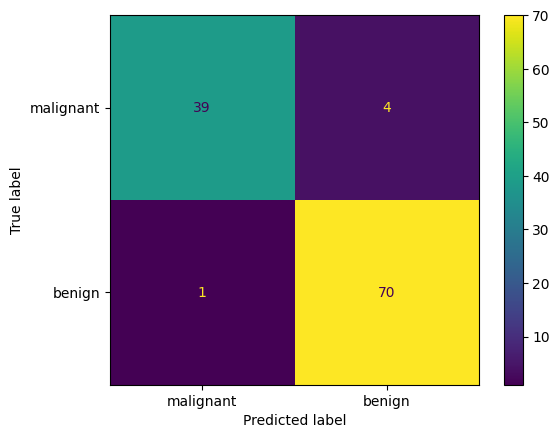

RMSE: 0.20942695414584775


In [ ]:
# Métricas
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.show()
print(f"RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_class)))



In [ ]:

# 5-fold
scores_5 = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
rmse_5 = np.sqrt(-scores_5)
print("5-Fold RMSE promedio:", rmse_5.mean())

# 10-fold
scores_10 = cross_val_score(model, X, y, cv=10, scoring="neg_mean_squared_error")
rmse_10 = np.sqrt(-scores_10)
print("10-Fold RMSE promedio:", rmse_10.mean())

# Leave-One-Out
loo = LeaveOneOut()
scores_loo = cross_val_score(model, X, y, cv=loo, scoring="neg_mean_squared_error")
rmse_loo = np.sqrt(-scores_loo)
print("Leave-One-Out RMSE promedio:", rmse_loo.mean())

5-Fold RMSE promedio: 0.25139074860832233
10-Fold RMSE promedio: 0.24686344205281135
Leave-One-Out RMSE promedio: 0.19249685715214054


---

Cuando construimos un modelo de Machine Learning, especialmente para problemas de clasificación, es fundamental saber qué tan bien se desempeña. No basta con que el modelo "funcione", necesitamos cuantificar su rendimiento para comparar diferentes modelos y elegir el mejor para nuestra tarea.

Este capítulo se centra en las herramientas y métricas clave para evaluar modelos. Comenzaremos con la Matriz de Confusión, la base de muchas métricas, y luego exploraremos la Curva ROC y el Área bajo la Cur Curva (AUC), que son esenciales para entender el rendimiento de un clasificador en diferentes umbrales.
## Matriz de Confusión
La Matriz de Confusión es una tabla que nos permite visualizar el rendimiento de un algoritmo de clasificación. Compara las predicciones de nuestro modelo con los valores reales (conocidos como 'ground truth'). Para un problema de clasificación binaria (dos clases, por ejemplo, 'Tiene Enfermedad Cardiaca' o 'No tiene Enfermedad Cardiaca'), la matriz se ve así:

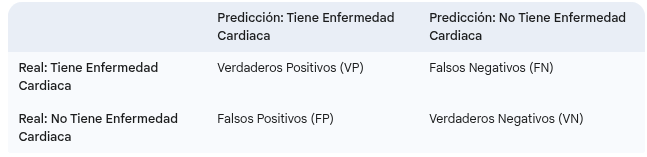

Cada celda representa un escenario:

Verdaderos Positivos (VP): El modelo predijo correctamente la clase positiva (ej. "Tiene Enfermedad Cardiaca") y el valor real también era positivo. ¡Un acierto!
Verdaderos Negativos (VN): El modelo predijo correctamente la clase negativa (ej. "No tiene Enfermedad Cardiaca") y el valor real también era negativo. ¡Otro acierto!
Falsos Positivos (FP): El modelo predijo la clase positiva, pero el valor real era negativo. Es una "falsa alarma" (Error de Tipo I).
Falsos Negativos (FN): El modelo predijo la clase negativa, pero el valor real era positivo. Es una "predicción fallida" (Error de Tipo II).
La matriz de confusión es la base para calcular la mayoría de las otras métricas de clasificación.

Matriz de Confusión:
[[47  2]
 [ 8  3]]


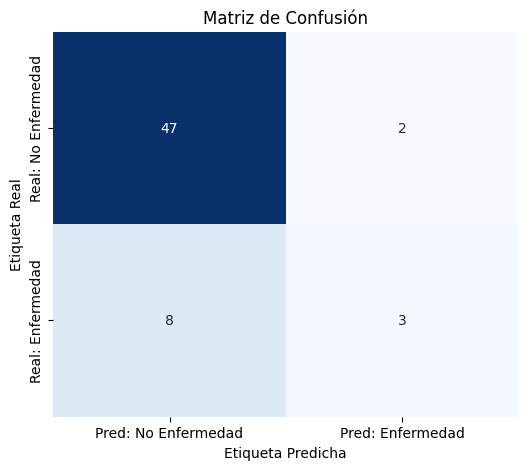


Reporte de Clasificación:
               precision    recall  f1-score   support

No Enfermedad       0.85      0.96      0.90        49
   Enfermedad       0.60      0.27      0.38        11

     accuracy                           0.83        60
    macro avg       0.73      0.62      0.64        60
 weighted avg       0.81      0.83      0.81        60


Precisión (Accuracy): 0.83


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo (simulados para el problema de "Enfermedad Cardiaca")
np.random.seed(42)
num_samples = 200
peso = np.random.normal(70, 10, num_samples) # Peso en kg
edad = np.random.normal(55, 8, num_samples)  # Edad en años
# Simular enfermedad cardíaca basada en peso y edad con algún ruido
# Mayor peso y edad aumentan la probabilidad
prob_enfermedad = 1 / (1 + np.exp(-(0.05 * peso + 0.1 * edad - 10)))
enfermedad_cardiaca = (prob_enfermedad + np.random.normal(0, 0.2, num_samples) > 0.5).astype(int)

# Crear un DataFrame (opcional, pero útil para organizar)
import pandas as pd
df = pd.DataFrame({'Peso': peso, 'Edad': edad, 'Enfermedad_Cardiaca': enfermedad_cardiaca})

# Dividir datos en entrenamiento y prueba
X = df[['Peso', 'Edad']]
y = df['Enfermedad_Cardiaca']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo de Regresión Logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calcular y mostrar la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

# Visualizar la Matriz de Confusión (mejor que solo texto)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred: No Enfermedad', 'Pred: Enfermedad'],
            yticklabels=['Real: No Enfermedad', 'Real: Enfermedad'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()


# Mostrar el Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Enfermedad', 'Enfermedad']))

# Calcular Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión (Accuracy): {accuracy:.2f}")

A partir de la Matriz de Confusión, podemos calcular varias métricas importantes para evaluar el rendimiento del modelo desde diferentes perspectivas:

Exactitud (Accuracy): Es la proporción de predicciones correctas sobre el total de predicciones.

           Accuracy= (VP+VN)/(FP+FN+VP+VN)
​

Es una buena métrica general, pero puede ser engañosa en conjuntos de datos desequilibrados (cuando una clase es mucho más frecuente que la otra).

Exhaustividad (Recall) o Sensibilidad (Sensitivity) o Tasa de Verdaderos Positivos (True Positive Rate - TPR): Responde a la pregunta: 'De todas las instancias positivas reales, ¿cuántas identificó correctamente el modelo?'.

           Recall= VP/(FN+VP)
​

Es crucial cuando es muy importante no perderse los casos positivos (ej. detección de enfermedades).

Precisión (Precision): Responde a la pregunta: 'De todas las instancias que el modelo predijo como positivas, ¿cuántas fueron realmente positivas?'.

           Precision=VP/(FP+VP)
​


Es crucial cuando el costo de un falso positivo es alto (ej. clasificar un correo como spam cuando no lo es).

Especificidad (Specificity) o Tasa de Verdaderos Negativos (True Negative Rate - TNR): Responde a la pregunta: 'De todas las instancias negativas reales, ¿cuántas identificó correctamente el modelo?'.

           Specificity= VN/+(VN+FP)
           


Puntuación F1 (F1-score): Es la media armónica de Precision y Recall. Es útil cuando se busca un equilibrio entre ambas métricas, especialmente en conjuntos de datos desequilibrados.

           F1-score=2 * ((Precision*Recall)/(Precision+Recall))

El classification_report de scikit-learn nos proporciona estas métricas para cada clase.
Por otro lado tambien usaremos:
RMSE (Root Mean Squared Error): Es una métrica usada en problemas de regresión. Indica cuánto se desvían las predicciones en promedio respecto a los valores reales


### Curva ROC y Área Bajo la Curva (AUC): Rendimiento del Umbral
Para los clasificadores que producen una probabilidad (como la Regresión Logística), necesitamos establecer un umbral de decisión. Por defecto, si la probabilidad es mayor a 0.5, se clasifica como 1; de lo contrario, como 0. Sin embargo, podemos cambiar este umbral para ajustar el comportamiento de nuestro modelo, por ejemplo, para ser más sensible a los casos positivos o más selectivo.

Aquí es donde la Curva ROC (Receiver Operating Characteristic) y el Área Bajo la Curva (AUC) son increíblemente útiles.

Tasa de Verdaderos Positivos (TPR) vs. Tasa de Falsos Positivos (FPR):

Ya conocemos la TPR (Recall).
La Tasa de Falsos Positivos (FPR) es la proporción de negativos reales que fueron clasificados incorrectamente como positivos.

    FPR=FP/(FP+VN)
    
**La Curva ROC**

La Curva ROC es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los posibles umbrales de clasificación. Traza la Tasa de Verdaderos Positivos (TPR) en el eje Y contra la Tasa de Falsos Positivos (FPR) en el eje X para diferentes umbrales.

Un modelo perfecto tendría una curva ROC que va directamente hacia la esquina superior izquierda (TPR=1, FPR=0).
Una línea diagonal (TPR = FPR) representa un clasificador aleatorio.
Cuanto más cerca esté la curva ROC de la esquina superior izquierda, mejor será el rendimiento del modelo.
**Área Bajo la Curva (AUC)**

El AUC es una métrica única que resume el rendimiento de la curva ROC. Representa la probabilidad de que el modelo clasifique correctamente una instancia positiva elegida al azar más alto que una instancia negativa elegida al azar.

AUC = 1.0: Modelo perfecto.
AUC = 0.5: Modelo aleatorio (tan bueno como lanzar una moneda).
AUC < 0.5: El modelo es peor que aleatorio (podría invertirse las predicciones para mejorarlo).
Un AUC alto indica que el modelo es bueno discriminando entre las clases positiva y negativa, independientemente del umbral de decisión elegido. Es una métrica robusta para comparar modelos cuando los conjuntos de datos están desequilibrados.

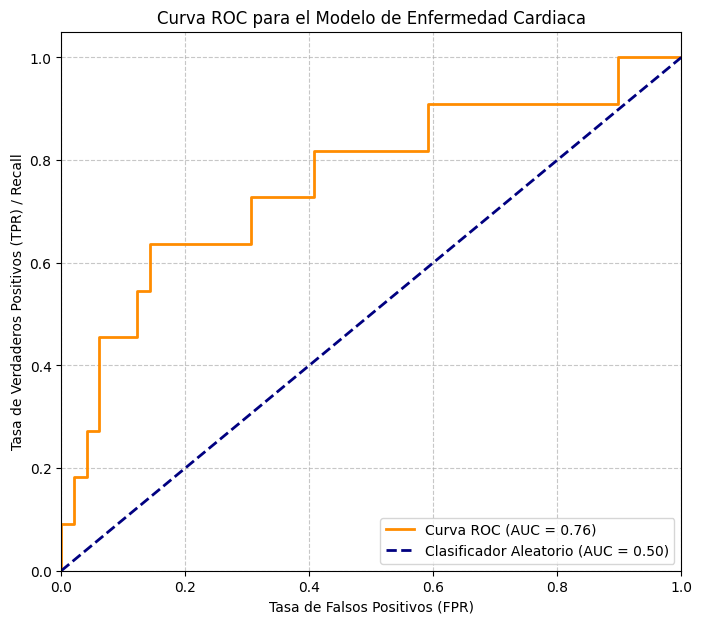

La Curva ROC muestra el rendimiento del clasificador en todos los umbrales de decisión posibles.
El eje Y es la Tasa de Verdaderos Positivos (TPR o Recall), que queremos maximizar.
El eje X es la Tasa de Falsos Positivos (FPR), que queremos minimizar.
Cuanto más cerca esté la curva de la esquina superior izquierda, mejor será el modelo.
El AUC (Área Bajo la Curva) resume el rendimiento global del modelo: 0.76
Un AUC de 1.0 es un clasificador perfecto, mientras que un AUC de 0.5 es un clasificador aleatorio.


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Asumimos que X_test, y_test y model ya están definidos del script anterior

# Obtener las probabilidades de la clase positiva (1)
y_prob_positive = model.predict_proba(X_test)[:, 1]

# Calcular la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR) para varios umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)

# Calcular el Área Bajo la Curva (AUC)
roc_auc = auc(fpr, tpr)

# --- Gráfico de la Curva ROC ---
plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) / Recall')
plt.title('Curva ROC para el Modelo de Enfermedad Cardiaca')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("La Curva ROC muestra el rendimiento del clasificador en todos los umbrales de decisión posibles.")
print("El eje Y es la Tasa de Verdaderos Positivos (TPR o Recall), que queremos maximizar.")
print("El eje X es la Tasa de Falsos Positivos (FPR), que queremos minimizar.")
print("Cuanto más cerca esté la curva de la esquina superior izquierda, mejor será el modelo.")
print(f"El AUC (Área Bajo la Curva) resume el rendimiento global del modelo: {roc_auc:.2f}")
print("Un AUC de 1.0 es un clasificador perfecto, mientras que un AUC de 0.5 es un clasificador aleatorio.")

Mientras que la Curva ROC es excelente para evaluar el rendimiento general de un clasificador, especialmente cuando las clases están balanceadas, la Curva Precisión-Exhaustividad (Precision-Recall Curve - PR Curve) es a menudo más informativa en problemas de clasificación con clases desequilibradas.

La PR Curve traza la Precisión en el eje Y contra la Exhaustividad (Recall) en el eje X para diferentes umbrales.

Un modelo perfecto tendría una curva que va directamente a la esquina superior derecha (Precision=1, Recall=1).
Cuanto más cerca esté la curva de la esquina superior derecha, mejor será el rendimiento del modelo, especialmente para identificar la clase minoritaria (positiva).
La razón por la que la Precisión funciona mejor que la Tasa de Falsos Positivos cuando los datos están muy desbalanceados es que la Precisión no incluye la cantidad de Verdaderos Negativos. Esto significa que no se ve afectada por una gran cantidad de verdaderos negativos (que son la mayoría en un conjunto de datos desequilibrado), lo que la hace más sensible al rendimiento en la clase positiva.

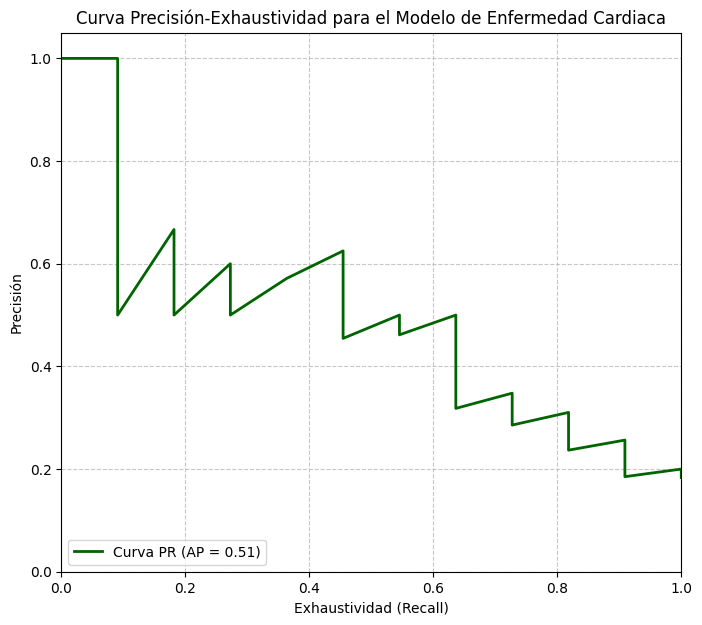

La Curva Precisión-Exhaustividad es particularmente útil cuando las clases están desequilibradas.
Cuanto más cerca esté la curva de la esquina superior derecha, mejor será el rendimiento del modelo.
La Precisión Promedio (AP) es el área bajo esta curva: 0.51
Un valor AP más alto indica un mejor rendimiento en la identificación de la clase positiva, minimizando los falsos positivos.


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Asumimos que y_test y y_prob_positive ya están definidos del script anterior

# Calcular Precisión y Exhaustividad para varios umbrales
precision, recall, _ = precision_recall_curve(y_test, y_prob_positive)

# Calcular el área bajo la curva Precision-Recall (AP - Average Precision)
# average_precision_score es el área bajo la curva PR
ap_score = average_precision_score(y_test, y_prob_positive)

# --- Gráfico de la Curva Precisión-Exhaustividad ---
plt.figure(figsize=(8, 7))
plt.plot(recall, precision, color='darkgreen', lw=2, label=f'Curva PR (AP = {ap_score:.2f})')
plt.xlabel('Exhaustividad (Recall)')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Exhaustividad para el Modelo de Enfermedad Cardiaca')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='lower left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("La Curva Precisión-Exhaustividad es particularmente útil cuando las clases están desequilibradas.")
print("Cuanto más cerca esté la curva de la esquina superior derecha, mejor será el rendimiento del modelo.")
print(f"La Precisión Promedio (AP) es el área bajo esta curva: {ap_score:.2f}")
print("Un valor AP más alto indica un mejor rendimiento en la identificación de la clase positiva, minimizando los falsos positivos.")

## Ejercicios
1. Un equipo de Machine Learning ha desarrollado un clasificador para detectar una enfermedad rara. Han obtenido los siguientes resultados en un conjunto de prueba de 2000 pacientes:

Pacientes con la enfermedad (Real Positivo): 100
Pacientes sin la enfermedad (Real Negativo): 1900
La matriz de confusión generada por su modelo es la siguiente:

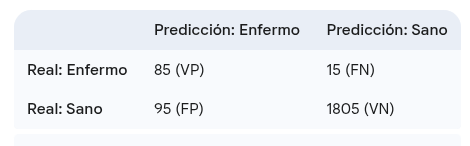

Responde a las siguientes preguntas, mostrando tus cálculos:

- Calcula la Precisión (Accuracy) del modelo. ¿Es esta una buena métrica para este problema? ¿Por qué sí o por qué no?
- Calcula la Sensibilidad (Recall / TPR). ¿Qué significa este valor en el contexto de la detección de enfermedades?
- Calcula la Especificidad (Specificity / TNR). ¿Qué significa este valor?
- Calcula la Precisión (Precision). ¿Qué significa este valor?
- Calcula la Puntuación F1 (F1-score).
- Considerando que esta es una enfermedad rara, ¿cuál de las métricas calculadas (Recall, Precision, F1-score) crees que es más crítica para evaluar el rendimiento de este modelo? Justifica tu respuesta."

2. Se te pide que entrenes un clasificador de Regresión Logística y visualices sus curvas ROC y Precisión-Exhaustividad para comprender mejor su rendimiento.

- Genera un conjunto de datos desequilibrado usando make_classification con 1000 muestras, 2 características y una class_sep baja (ej. 0.7) para que las clases sean difíciles de separar, y weights=[0.95, 0.05] para el desequilibrio.
- Divide los datos en conjuntos de entrenamiento y prueba.
- Entrena un modelo de LogisticRegression.
- Calcula las probabilidades de predicción para la clase positiva en el conjunto de prueba.
- Calcula y grafica la Curva ROC y su AUC.
- Calcula y grafica la Curva Precisión-Exhaustividad y su AP (Average Precision).
- Basándote en ambas curvas, ¿por qué la Curva Precisión-Exhaustividad es a menudo más informativa que la Curva ROC para conjuntos de datos desequilibrados?